In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('D:/Users/User/Downloads')
data = pd.read_csv('candy-data.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [7]:
data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score , confusion_matrix , precision_score , f1_score
from sklearn.model_selection import train_test_split

In [35]:
x = data.iloc[:,2:11]
y = data.iloc[:,1]

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split (x,y,test_size=0.4)
model = LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
pred = model.predict(xtrain)
confusion_matrix(ytrain,pred)

array([[25,  2],
       [ 7, 17]], dtype=int64)

In [38]:
precision_score(ytrain,pred)

0.8947368421052632

In [39]:
accuracy_score(ytrain,pred)

0.8235294117647058

In [40]:
pred = model.predict(xtest)
confusion_matrix(ytest,pred)

array([[18,  3],
       [ 2, 11]], dtype=int64)

In [41]:
precision_score(ytest,pred)

0.7857142857142857

In [42]:
accuracy_score(ytest,pred)

0.8529411764705882

In [43]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

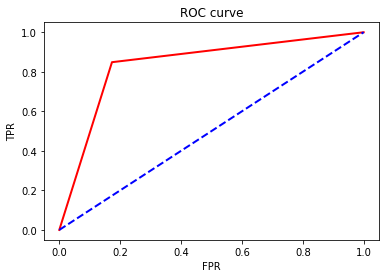

In [44]:
fpr, tpr,_=roc_curve(model.predict(x),y,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [45]:
recall_score(ytest,pred)

0.8461538461538461

In [47]:
f1_score(ytest,pred)

0.8148148148148148